In [1]:
pip install faiss-cpu sentence-transformers transformers numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 41.6 MB/s eta 0:00:00


In [2]:
import os
from google.colab import drive
drive.mount('/gdrive')
os.chdir('/gdrive/My Drive/nlp_project')

Mounted at /gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset
data = pd.read_csv("cv_nlp_ml_2023-2024_cleaned_142k.csv")

<ipython-input-3-007fb168ca9b>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cv_nlp_ml_2023-2024_cleaned_142k.csv")


In [4]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,id,authors,title,abstract,update_date,year
0,808.0521,Ian Pratt-Hartmann and Lawrence S. Moss,Logics for the Relational Syllogistic,The Aristotelian syllogistic cannot account ...,2024-04-24,2024
1,901.359,Chunhua Shen and Hanxi Li,On the Dual Formulation of Boosting Algorithms,We study boosting algorithms from a new pers...,2023-05-30,2023
2,902.343,"Yishay Mansour, Mehryar Mohri, Afshin Rostamiz...",Domain Adaptation: Learning Bounds and Algorithms,This paper addresses the general problem of ...,2023-12-04,2023
3,1001.4297,"Andrew D. Straw, Kristin Branson, Titus R. Neu...",Multi-camera Realtime 3D Tracking of Multiple ...,Automated tracking of animal movement allows...,2023-02-01,2023
4,1007.1025,Henryk Fuk\'s,Inflection system of a language as a complex n...,We investigate inflection structure of a syn...,2023-12-18,2023


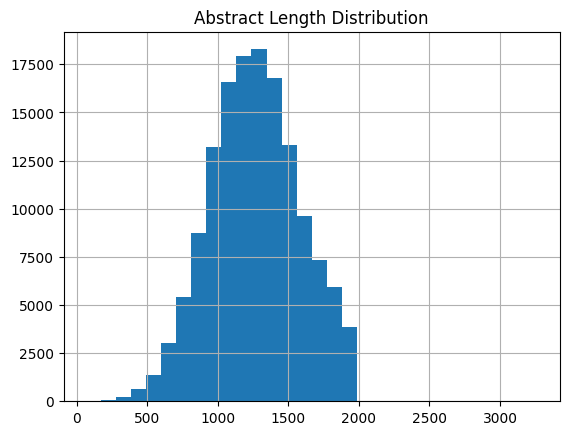

In [5]:
# Abstract length distribution
data['abstract_length'] = data['abstract'].apply(len)
data['abstract_length'].hist(bins=30)
plt.title("Abstract Length Distribution")
plt.show()


In [6]:
"""from sentence_transformers import SentenceTransformer
import numpy as np

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
data['embeddings'] = data['abstract'].apply(lambda x: model.encode(x))

# Save embeddings
np.save("embeddings.npy", np.vstack(data['embeddings']))
data.to_csv("filtered_data_with_embeddings.csv", index=False)"""


'from sentence_transformers import SentenceTransformer\nimport numpy as np\n\n# Load model\nmodel = SentenceTransformer(\'all-MiniLM-L6-v2\')\n\n# Generate embeddings\ndata[\'embeddings\'] = data[\'abstract\'].apply(lambda x: model.encode(x))\n\n# Save embeddings\nnp.save("embeddings.npy", np.vstack(data[\'embeddings\']))\ndata.to_csv("filtered_data_with_embeddings.csv", index=False)'

In [7]:
import faiss
import numpy as np

# Load embeddings
# embeddings = np.load("embeddings.npy")
# dimension = embeddings.shape[1]

# Build FAISS index
# index = faiss.IndexFlatL2(dimension)  # Use L2 distance
# index.add(embeddings)  # Add embeddings to index

# Save the FAISS index
# faiss.write_index(index, "faiss_index.bin")



faiss_index_file = "faiss_index.bin"

# Load the FAISS index
index = faiss.read_index(faiss_index_file)

# Check if the index is loaded successfully
print("FAISS index loaded successfully!")
print(f"Number of indexed documents: {index.ntotal}")


FAISS index loaded successfully!
Number of indexed documents: 142371


In [8]:
from sentence_transformers import SentenceTransformer
# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# Function to search for similar papers
def search_faiss(query, top_k=15):
    # Encode the query to an embedding
    query_embedding = model.encode(query).reshape(1, -1)

    # Search the FAISS index
    distances, indices = index.search(query_embedding, top_k)

    # Retrieve top papers
    results = data.iloc[indices[0]]
    return results, distances[0]

In [10]:
query1 = "How can we evaluate the quality of text generated by AI models in the absence of ground truth? Propose a framework that leverages reference-free evaluation techniques, such as semantic similarity, coherence scoring, and factual consistency checks using external knowledge sources. Include potential metrics, methodologies, and tools that could be used to assess fluency, relevance, and informativeness of the generated text."

In [11]:
query2 = "Investigate fine-tuning smaller language models for literature review generation in specialized domains. Analyze the impact of domain-specific pretraining, prompt engineering, and retrieval-augmented techniques for improving coherence and relevance."


In [12]:
query3 = "How can Retrieval-Augmented Generation (RAG) architectures be leveraged to improve the contextual relevance and factual consistency of AI-generated literature reviews using the arXiv dataset?"

In [13]:
def format_references(query, top_k=10):
    # Retrieve relevant papers
    top_papers, _ = search_faiss(query, top_k)

    # Format each paper in reference style
    references = []
    for idx, row in top_papers.iterrows():
        title = row['title']
        authors = row['authors']
        date = row['year']
        formatted_reference = f"{authors}. [{date}]. {title}."
        references.append(formatted_reference)

    # Print all references
    print("References:\n")
    for idx, ref in enumerate(references, start=1):
        print(f"{idx}. {ref}")

# Example usage

format_references(query3)


References:

1. Hao Yu, Aoran Gan, Kai Zhang, Shiwei Tong, Qi Liu, Zhaofeng Liu. [2024]. Evaluation of Retrieval-Augmented Generation: A Survey.
2. Yizheng Huang and Jimmy Huang. [2024]. A Survey on Retrieval-Augmented Text Generation for Large Language
  Models.
3. Xuan-Phi Nguyen, Shrey Pandit, Senthil Purushwalkam, Austin Xu, Hailin
  Chen, Yifei Ming, Zixuan Ke, Silvio Savarese, Caiming Xong, Shafiq Joty. [2024]. SFR-RAG: Towards Contextually Faithful LLMs.
4. Shubham Agarwal, Issam H. Laradji, Laurent Charlin, Christopher Pal. [2024]. LitLLM: A Toolkit for Scientific Literature Review.
5. Shahul Es, Jithin James, Luis Espinosa-Anke, Steven Schockaert. [2023]. RAGAS: Automated Evaluation of Retrieval Augmented Generation.
6. Florin Cuconasu, Giovanni Trappolini, Federico Siciliano, Simone
  Filice, Cesare Campagnano, Yoelle Maarek, Nicola Tonellotto, Fabrizio
  Silvestri. [2024]. The Power of Noise: Redefining Retrieval for RAG Systems.
7. Dian Jiao, Li Cai, Jingsheng Huang, Wenqia

In [14]:
import pandas as pd

def save_paper_ids_and_titles(query, top_k=100, save_path="paper_ids_and_titles.csv"):
    """
    Retrieve relevant papers and save paper_id and title to a CSV file.

    Parameters:
        query (str): The search query.
        top_k (int): Number of top results to retrieve.
        save_path (str): Path to save the paper IDs and titles (default: "paper_ids_and_titles.csv").
    """
    # Retrieve relevant papers
    top_papers, _ = search_faiss(query, top_k)

    # Extract paper_id and title
    paper_data = []
    for idx, row in top_papers.iterrows():
        paper_id = row['id']  # Assuming 'paper_id' column exists
        title = row['title']       # Assuming 'title' column exists
        paper_data.append({"id": paper_id, "title": title})

    # Save paper IDs and titles to a CSV file
    paper_df = pd.DataFrame(paper_data)
    paper_df.to_csv(save_path, index=False)
    print(f"\nPaper IDs and titles saved to {save_path}")

# Example usage
save_paper_ids_and_titles(query="Retrieval-Augmented Generation (RAG) architectures", top_k=100, save_path="paper_ids_and_titles_RAG.csv")



Paper IDs and titles saved to paper_ids_and_titles_RAG.csv


In [15]:
!pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1


In [16]:
import requests
import os
from together import Together

# Set your Together.ai API key
api_key = "<add-api-key>"
os.environ["TOGETHER_API_KEY"] = api_key


In [29]:
# Initialize the Together client
client = Together()

#def generate_literature_review_with_citations(query, top_papers, model="deepseek-ai/deepseek-llm-67b-chat", max_tokens=1000):
#def generate_literature_review_with_citations(query, top_papers, model="Qwen/Qwen2.5-7B-Instruct-Turbo", max_tokens=1200):
def generate_literature_review_with_citations(query, top_papers, model="meta-llama/Llama-3.2-3B-Instruct-Turbo", max_tokens=900):

    references = []
    context_with_citations = ""

    for idx, (_, row) in enumerate(top_papers.iterrows(), start=1):
        title = row['title']
        authors = row['authors']
        date = row['update_date'][:4]

        # Format citation as "[1]", "[2]", etc., and add reference to context
        citation = f"[{idx}]"
        formatted_reference = f"{citation} {authors}. ({date}). {title}."
        references.append(formatted_reference)

        # Add the abstract to context with citation
        context_with_citations += f"{citation} Title: {title}\nAbstract: {row['abstract']}\n\n"

    # Combine query, context with citations, and a prompt to encourage citation use
    prompt = (
f"""
Based on the research query: {query} and the provided relevant papers' abstracts with citations: {context_with_citations}, generate a comprehensive literature review. Ensure that each abstract is discussed in the review.
The review should flow naturally through these themes in well-developed paragraphs:
- Begin by introducing the topic's significance and current relevance.
- Establish the historical context and foundational developments.
- Examine key methodological approaches and their evolution.
- Analyze critical challenges and limitations in the field.
- Discuss recent innovations and breakthroughs.

Important guidelines:
- Write in flowing paragraphs without section headers or bullet points.
- Each paragraph should focus on a single main idea with supporting details.
- Use natural transitions between paragraphs to maintain a cohesive narrative.
- Seamlessly integrate citations into the discussion to emphasize their relevance (e.g., [1], [2]).
- Maintain an academic tone, using concise yet sophisticated language.
- Use only information and citations from the provided context.
- Ensure each paragraph is substantial (5-7 sentences), well-developed, and introduces new insights.
- Avoid repeating concepts across paragraphs. Connect ideas across paragraphs to build a cohesive and comprehensive review.

Begin directly with the review content, without any introductory phrases or formatting. Don't provide a references section.
"""

# f"Generate a comprehensive literature review on this idea :  {query} \nProviding you with context and citations as well here:{context_with_citations}\n\n Structure the review with the following sections:"

# f"1. Introduction: Briefly introduce the topic, explain its significance, and outline the scope of the literature review."
# f"2. Background: Provide an overview of the historical development of the topic and foundational concepts needed to understand recent advancements."
# f"3. Methodologies: Describe the various methodologies and approaches used in this field, highlighting significant models, techniques, or algorithms. Include explanations of their strengths, limitations, and unique applications."
# f"4. Challenges: Discuss the main challenges and limitations encountered in the field, including technical, methodological, or practical difficulties."
# f"5. Recent Advancements: Outline recent breakthroughs and innovative approaches that address some of these challenges. Mention any notable datasets, tools, or frameworks that have contributed to recent progress."
# f"6. Future Directions: Offer insights into potential future developments and trends, including emerging techniques, anticipated improvements, or areas requiring further research."
# f"Each section should be thorough, containing multiple paragraphs with in-depth analysis, examples, and insights. Use inline citations (e.g., [1], [2]) for any information derived from the provided sources, and ensure that the review is cohesive, logically structured, and relevant to the query. Avoid using any references outside the provided list. Aim for a well-rounded academic tone, and focus on delivering a literature review suitable for a scholarly audience."
# f"Provide the entire response as plain text without any headings, bullet points, or other formatting apart from new lines to separate paragraphs."

# f"Generate a literature survey section for comprehensive and very detailed literature review based on the following sources. "
        # f"Make sure to use all the papers given as sources. Please include inline citations (e.g., [1], [2]) based on the provided list.\n\n"
        # f"Query: {query}\n\nContext:\n{context_with_citations}\n\n"
        # f"Generate a coherent literature review with citations for all the papers:"
    )

    # Call the Together.ai API
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=max_tokens,
        temperature=0.4
    )

    # Extract the generated text
    generated_text = response.choices[0].message.content.strip()

    # Append the references to the output
    references_section = "\n\nReferences:\n" + "\n".join(references)
    return generated_text + references_section


In [18]:
query3 = "How can we design a system for generating high-quality, contextually relevant literature reviews from an input idea using Retrieval-Augmented Generation (RAG) or GraphRAG? Additionally, how can we address challenges such as the absence of ground truth and computational constraints while evaluating the generated reviews effectively through a combination of quantitative metrics and qualitative rubrics to ensure relevance, coherence, and informativeness?"

In [19]:
query3 = "What techniques can improve factual accuracy in large language models for open-domain question answering? Discuss retrieval-augmented generation (RAG), fine-tuning with knowledge bases, and evaluation metrics to measure accuracy."

In [30]:
query3 = "What techniques can improve factual accuracy in large language models for open-domain question answering? Discuss retrieval-augmented generation (RAG), fine-tuning with knowledge bases, and evaluation metrics to measure accuracy."

In [31]:
top_papers, _ = search_faiss(query3, top_k=5)

In [ ]:
combined, abstracts, titles = [], [], []
for _, row in top_papers.iterrows():
      title = row['title']
      abstract = row['abstract']
      combined_ny = [
        {"title": title ,
         "abstract": abstract
         }]
      combined.append(combined_ny)
      abstracts.append(abstract)
      titles.append(title)

In [ ]:
combined

[[{'title': 'RAG-QA Arena: Evaluating Domain Robustness for Long-form Retrieval\n  Augmented Question Answering',
   'abstract': "  Question answering based on retrieval augmented generation (RAG-QA) is an\nimportant research topic in NLP and has a wide range of real-world\napplications. However, most existing datasets for this task are either\nconstructed using a single source corpus or consist of short extractive\nanswers, which fall short of evaluating large language model (LLM) based RAG-QA\nsystems on cross-domain generalization. To address these limitations, we create\nLong-form RobustQA (LFRQA), a new dataset comprising human-written long-form\nanswers that integrate short extractive answers from multiple documents into a\nsingle, coherent narrative, covering 26K queries and large corpora across seven\ndifferent domains. We further propose RAG-QA Arena by directly comparing\nmodel-generated answers against LFRQA's answers using LLMs as evaluators. We\nshow via extensive experime

In [ ]:
 # Retrieve top papers for context
literature_review_with_citations = generate_literature_review_with_citations(query3, top_papers)
print("\nGenerated Literature Review with Citations:")


print(literature_review_with_citations)


Generated Literature Review with Citations:
The topic of improving factual accuracy in large language models for open-domain question answering has gained significant attention in recent years due to its wide range of real-world applications. The development of large language models has revolutionized the field of natural language processing, enabling machines to understand and generate human-like language. However, these models often struggle with providing accurate and reliable answers to user queries, particularly in open-domain question answering tasks.

Historically, the field of question answering has its roots in the early days of artificial intelligence, where researchers focused on developing systems that could understand and respond to human queries. The introduction of large language models has marked a significant shift in this field, enabling machines to process and generate vast amounts of text data. However, these models often rely on memorization and pattern recognitio

Evaluation

In [21]:
# Load prompts from the CSV file
#prompts_file = "prompts/old/Extra_Refined_Query_Prompts.csv"


prompts_file = "research_prompts_15.csv"
prompts_df = pd.read_csv(prompts_file)
#domain = 'nlp'
selected_prompts = prompts_df['query'].tolist()

# Process each prompt using the RAG implementation
results = []

In [22]:
prompts_df.head()

,Index,query,response,context
0,1,What techniques can improve factual accuracy i...,The techniques that can improve factual accura...,"According to the provided community summary, t..."
1,2,How does Retrieval-Augmented Generation (RAG) ...,Retrieval-Augmented Generation (RAG) is a meth...,"According to the provided information, Retriev..."
2,3,What are the key challenges in implementing ef...,The implementation of effective Retrieval-Augm...,the key challenges in implementing effective ...
3,4,How can RAG techniques be optimized to improve...,Optimizing Retrieval-Augmented Generation (RAG...,To optimize RAG techniques for improving reaso...
4,5,What are the most promising methods for enhanc...,The optimization of Retrieval-Augmented Genera...,the most promising methods for enhancing the e...


In [23]:
selected_prompts[0]

'What techniques can improve factual accuracy in large language models for open-domain question answering? Discuss retrieval-augmented generation (RAG), fine-tuning with knowledge bases, and evaluation metrics to measure accuracy.'

In [27]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [28]:
# Save the results to a new CSV file for analysis
results_output_file = "evaluation/rag_results_15_3b.csv"
results_df.to_csv(results_output_file, index=False)
print(f"RAG results saved to {results_output_file}")

RAG results saved to evaluation/rag_results_15_3b.csv


In [26]:
for query in selected_prompts:
    print(f"Processing query: {query}")

    # Retrieve recommended papers
    top_papers, _ = search_faiss(query, top_k=10)

    # Generate the literature review
    literature_review = generate_literature_review_with_citations(query, top_papers)
    abstracts = []
    titles = []
    # Extract titles and abstracts of recommended papers
    for _, row in top_papers.iterrows():
      title = row['title']
      abstract = row['abstract']

    combined = [
        {"title": title ,
         "abstract": abstract
         }
    ]

    abstracts.append(abstract)
    titles.append(title)

    # Append results for later saving
    results.append({
        "query": query,
        "title" : title,
        "abstracts": abstract,
        "combined": combined,
        "literature_review": literature_review
    })

Processing query: What techniques can improve factual accuracy in large language models for open-domain question answering? Discuss retrieval-augmented generation (RAG), fine-tuning with knowledge bases, and evaluation metrics to measure accuracy.
Processing query: How does Retrieval-Augmented Generation (RAG) address the limitations of Large Language Models (LLMs), particularly in terms of hallucinations and knowledge consistency?
Processing query: What are the key challenges in implementing effective RAG systems, and what innovative approaches have researchers proposed to overcome these challenges?
Processing query: How can RAG techniques be optimized to improve reasoning capabilities and knowledge retrieval in complex, knowledge-intensive tasks?
Processing query: What are the most promising methods for enhancing the efficiency and performance of RAG systems, particularly in terms of computational overhead and context compression?
Processing query: What are the current evaluation met